#A Comparision Between Locally Weighted Regression and Random Forest

In [ ]:
!pip install session-info
import session_info

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 120

This project will compare the performance of random forest regressor and locally weighted regression on smaples with one variable. The dataset I choose for the purpose of this project is Boston Housing Prices. Mean Square Error is used to evaluate the accuracy of the two models. I will do a K fold cross validation on the result of the predictions made by each model.

## Random Forest

Random Forest is an ensemble model made up of an ensemble of decision trees. It was first introduced in 1995 by Ho to address the problem of overfitting in deelpy grown decision tree model and increase the overal accuracy of both training and testing data. To achieve this process, we need to generate a series of data based on the original dataset. The data generated by this method, bootstrapping, looks similar like the original data. After new sets of data are produced, decision trees are fitted to the datasets. For regression problems, the overall random forest outcome will take the average outcome of all decision trees.

For the purpose of this project, we will use random forest model from scikit learn library.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#import the data.
data = pd.read_csv('data/BostonHousingPrices.csv')

In [ ]:
data.head(20)

,town,tract,longitude,latitude,crime,residential,industrial,river,nox,rooms,older,distance,highway,tax,ptratio,lstat,cmedv
0,Nahant,2011,-70.955002,42.255001,0.00632,18.0,2.31,no,0.538,6.575,65.199997,4.0900,1,296,15.300000,4.980000,24.000000
1,Swampscott,2021,-70.949997,42.287498,0.02731,0.0,7.07,no,0.469,6.421,78.900002,4.9671,2,242,17.799999,9.140000,21.600000
2,Swampscott,2022,-70.935997,42.283001,0.02729,0.0,7.07,no,0.469,7.185,61.099998,4.9671,2,242,17.799999,4.030000,34.700001
3,Marblehead,2031,-70.928001,42.292999,0.03237,0.0,2.18,no,0.458,6.998,45.799999,6.0622,3,222,18.700001,2.940000,33.400002
4,Marblehead,2032,-70.921997,42.298000,0.06905,0.0,2.18,no,0.458,7.147,54.200001,6.0622,3,222,18.700001,5.330000,36.200001
5,Marblehead,2033,-70.916496,42.304001,0.02985,0.0,2.18,no,0.458,6.430,58.700001,6.0622,3,222,18.700001,5.210000,28.700001
6,Salem,2041,-70.935997,42.297001,0.08829,12.5,7.87,no,0.524,6.012,66.599998,5.5605,5,311,15.200000,12.430000,22.900000
7,Salem,2042,-70.937500,42.310001,0.14455,12.5,7.87,no,0.524,6.172,96.099998,5.9505,5,311,15.200000,19.150000,22.100000
8,Salem,2043,-70.932999,42.312000,0.21124,12.5,7.87,no,0.524,5.631,100.000000,6.0821,5,311,15.200000,29.930000,16.500000
9,Salem,2044,-70.929001,42.316002,0.17004,12.5,7.87,no,0.524,6.004,85.900002,6.5921,5,311,15.200000,17.100000,18.900000


We will use rooms(the number of rooms) as the independent varible (x) and cmedv(corrected median values of owner-occupied housing in USD 1000) as the dependent variable(y).

First, I want to plot x, y values in a 2-D space

In [ ]:
x = data['lstat'].values
y = data['cmedv'].values

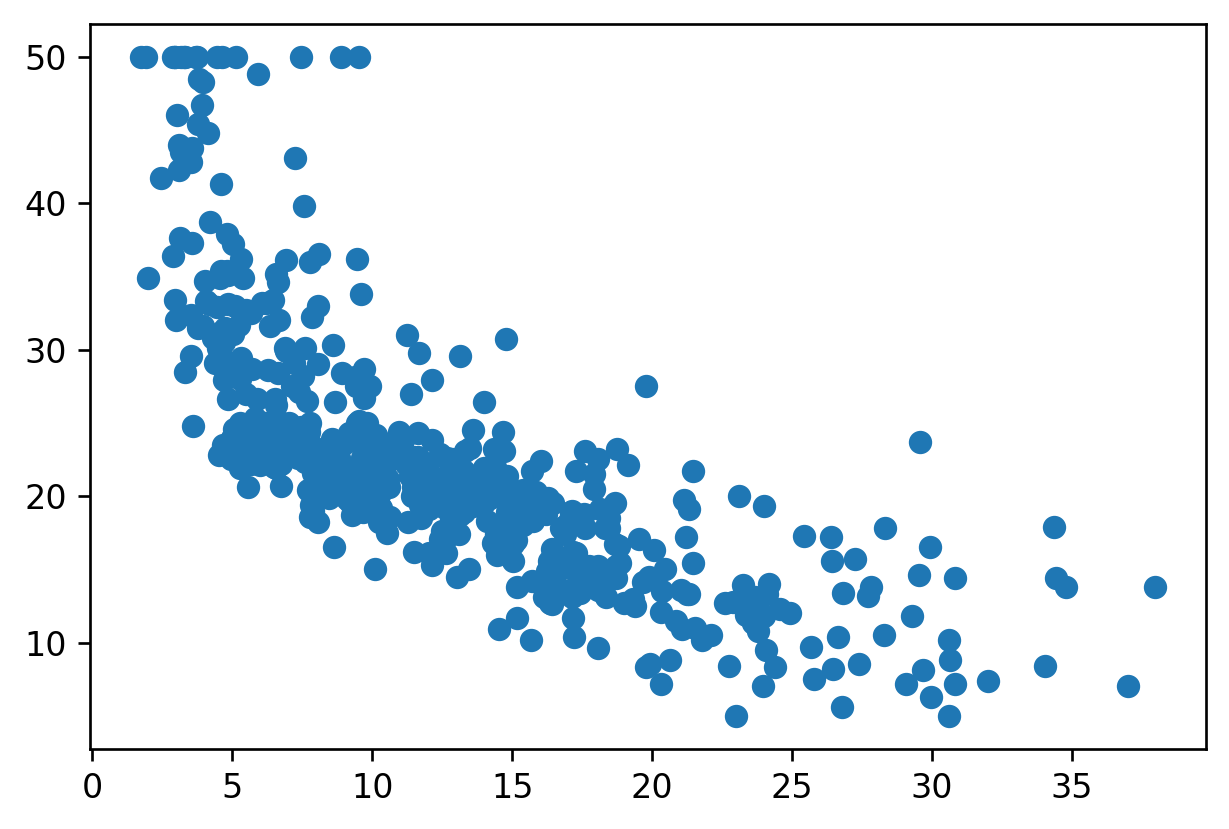

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.show()

To compare the accuracy of the models, I will use the crossvalidated mean  square error between y and the predicted values of y.

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler as scale
def DoKFold(model,X,y):

    mse_list = []
    kf = KFold(n_splits=10,random_state=123,shuffle = True)

    for idxtrain,idxtest in kf.split(X):
        Xtrain = X[idxtrain]
        Xtest = X[idxtest]
        ytrain = y[idxtrain]
        ytest = y[idxtest]

        model.fit(Xtrain,ytrain)
        mse_list.append(mse(ytest,model.predict(Xtest)))

    return np.mean(mse_list)

In [ ]:
from sklearn.ensemble import RandomForestRegressor as RFR

In [ ]:
X = x.reshape(-1,1)
mse_ = []
model = RFR(max_depth = 3,random_state=146)
mse_.append(DoKFold(model,X,y))
y_est = model.predict(X)
print(mse_)

[27.286248839501887]


 The mean square error of yhat estimated by random forest regressor and sample y is 27.29

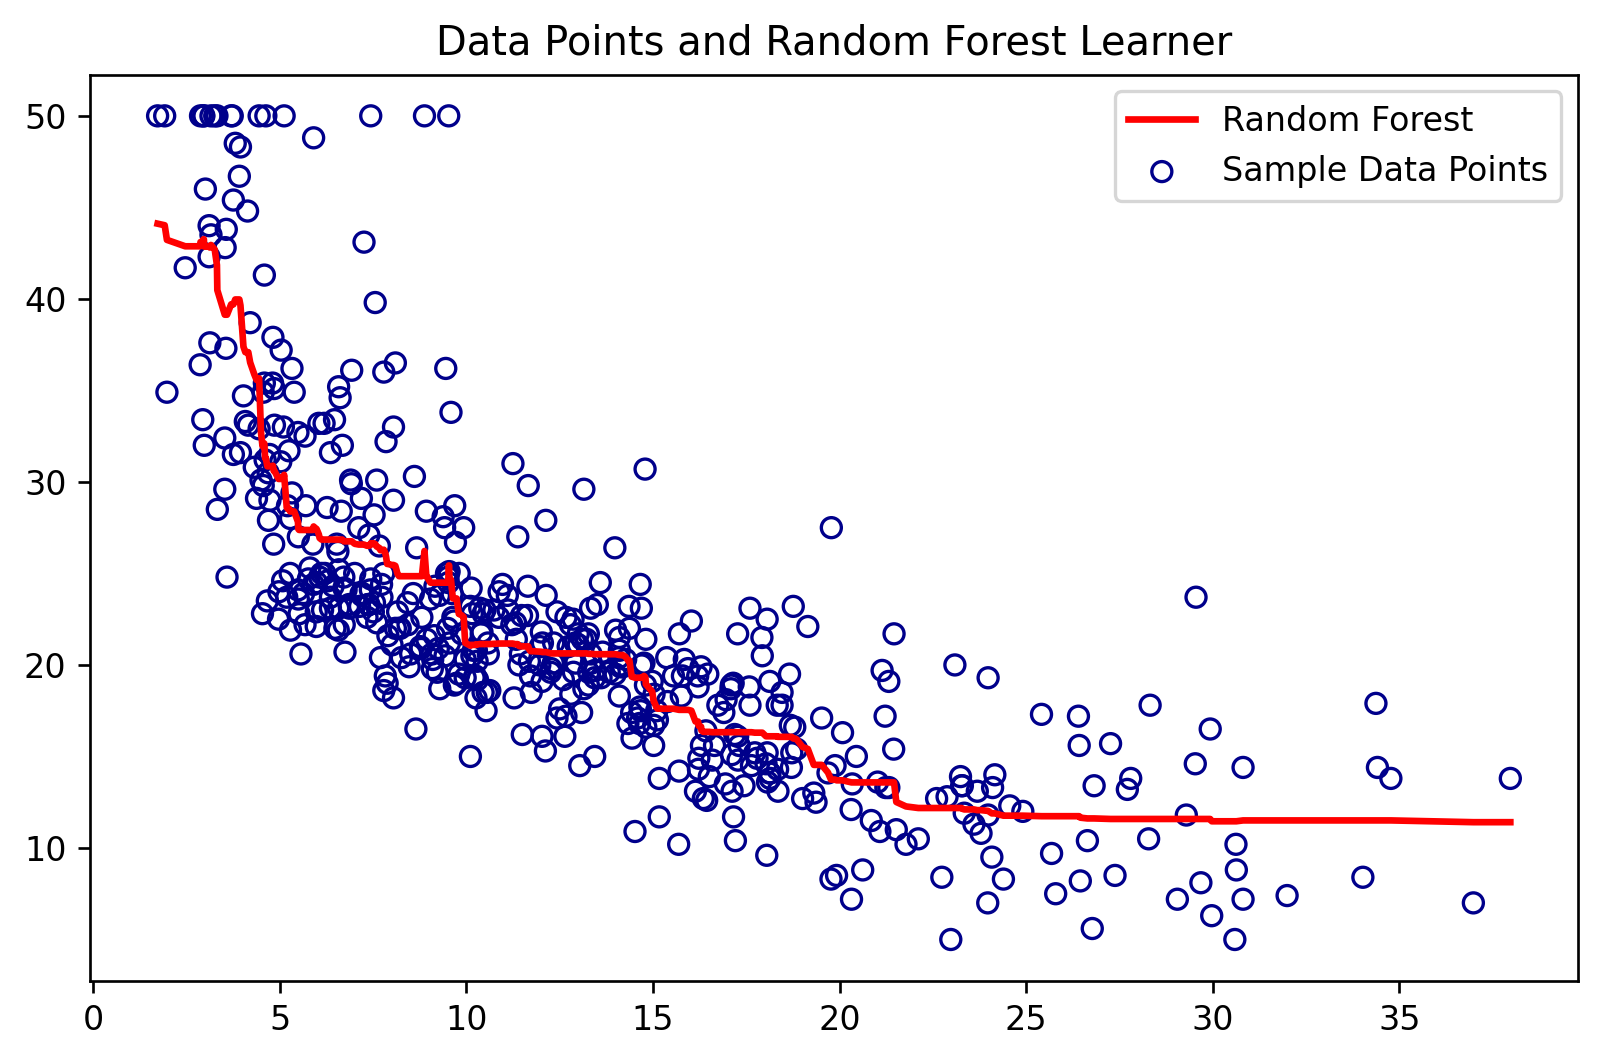

In [ ]:
#draw a figure of sample data points and the curve of estimated y
x_sorted = np.sort(x)
yest_sorted = model.predict(x_sorted.reshape(-1,1))
plt.figure(figsize=(8,5))
plt.scatter(x,y,facecolors = 'none', edgecolor = 'darkblue', label = 'Sample Data Points')
plt.plot(x_sorted,yest_sorted,color='red',lw=2,label = 'Random Forest')
plt.legend()
plt.title('Data Points and Random Forest Learner')
plt.show()

## Locally Weighted Regression

Locally Weighted Regression, or LOESS, is a non-parametric regression model.

For each data points, we create a weight. The weight is decided by the data points near the desired data points. To conduct locally weighted regression analysis, we need to set up the 'neighborhood' of nearby data.

We sent the Euclidean distances between the desired observation and points in the neighborhood into a weighting function. The further the data point from the desired point, the less the weight is. We denote the output weight as W.

For a linear regression algorithm, we compute $\beta$ using the normal equation:

$$\hat{\beta} = (X^{T}X)^{-1}X^{T}Y$$

$\hat{\beta}$ is a vector of all parameters, X is a matrix with all the observations.

For locally weighted regression, we will add the weighting terms into the noraml equation:

$$\hat{\beta} = (X^{T}WX)^{-1}X^{T}WY$$

W is a matrix with all the weights on the main diagonal. All other elements of W are 0.

The estimated y will be:

$$\hat{y}=X(X^{T}WX)^{-1}(X^{T}WY)$$





In the following part, I will build a locally weighted regression algorithm.

First, we need to construct the weighting function, or kernel. The most common kernels are tricubic kernel. In the following lines of kernel function, we also specify the size of the 'neighborhood' of the x observations that are used to build the local regression model. Here, we will threshold the distance of 1, meaning that we only use the points which its distance from the desired data points is less than one to calculate the weights.


In [ ]:
def tricubic(x):
  return np.where(np.abs(x)>1,0,(1-np.abs(x)**3)**3)

The following lines of code is the algorithm of one-variable locally weighted regression. We will use the hyperparameter tau to specify the bandwidth of the kernel. To find a better learner, we will adjust the tau value to find the optimal hyperparameter later in this section. The function will initiate the weight by inputing the euclidean distances of the desired x(the ith observation in the whole sample) to other observations to the kernel function and divide it with the hyperparameter. Then, it will loop through x and predict the corresponding y with locally weighted regression. The function will return all estimated y.  

In [ ]:
from scipy import linalg
from scipy.interpolate import interp1d

In [ ]:
def lowess_reg(x, y, xnew, kern, tau):
    # tau is called bandwidth K((x-x[i])/(2*tau))
    # IMPORTANT: we expect x to the sorted increasingly
    n = len(x)
    yest = np.zeros(n)

    #Initializing all weights from the bell shape kernel function
    w = np.array([kern((x - x[i])/(2*tau)) for i in range(n)])

    #Looping through all x-points
    for i in range(n):
        weights = w[:, i]
        b = np.array([np.sum(weights * y), np.sum(weights * y * x)])
        A = np.array([[np.sum(weights), np.sum(weights * x)],
                    [np.sum(weights * x), np.sum(weights * x * x)]])
        #theta = linalg.solve(A, b) # A*theta = b
        theta, res, rnk, s = linalg.lstsq(A, b)
        yest[i] = theta[0] + theta[1] * x[i]
    f = interp1d(x, yest,fill_value='extrapolate')
    return f(xnew)


In [ ]:
lowess_reg(x,y,10,tricubic,0.1)

array(21.55267896)

We can now test the algorithm on the dataset we imported earlier. We will use cross-validation to evaluate the accuracy of this learning algorithm.



In [ ]:
def DoKFold(X,y,tau,kern):

    mse_list = []
    kf = KFold(n_splits=10,random_state=123,shuffle = True)

    for idxtrain,idxtest in kf.split(X):
        Xtrain = X[idxtrain]
        Xtest = X[idxtest]
        ytrain = y[idxtrain]
        ytest = y[idxtest]

        yest = lowess_reg(Xtrain, ytrain, Xtest,kern, tau)
        mse_list.append(mse(ytest,yest))
    return np.mean(mse_list)

In [ ]:
DoKFold(x,y,0.1,tricubic)

38.58672053606643

In [ ]:
tau_range = np.linspace(0.1,2,20)
tau_range

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ])

In [ ]:
MSE_Lowess = []
for i in tau_range:
  MSE_Lowess.append(DoKFold(x,y,i,tricubic))


In [ ]:
tau_range[np.where(MSE_Lowess==np.min(MSE_Lowess))]

array([1.5])

In [ ]:
np.min(MSE_Lowess)

26.97001081825933

The cross validated mean square error of y predicted by locally weighted regression and sample data is 26.97. Compared to that of y predicted by random forest, 27.29, locally weighted regressor achieved the better result.

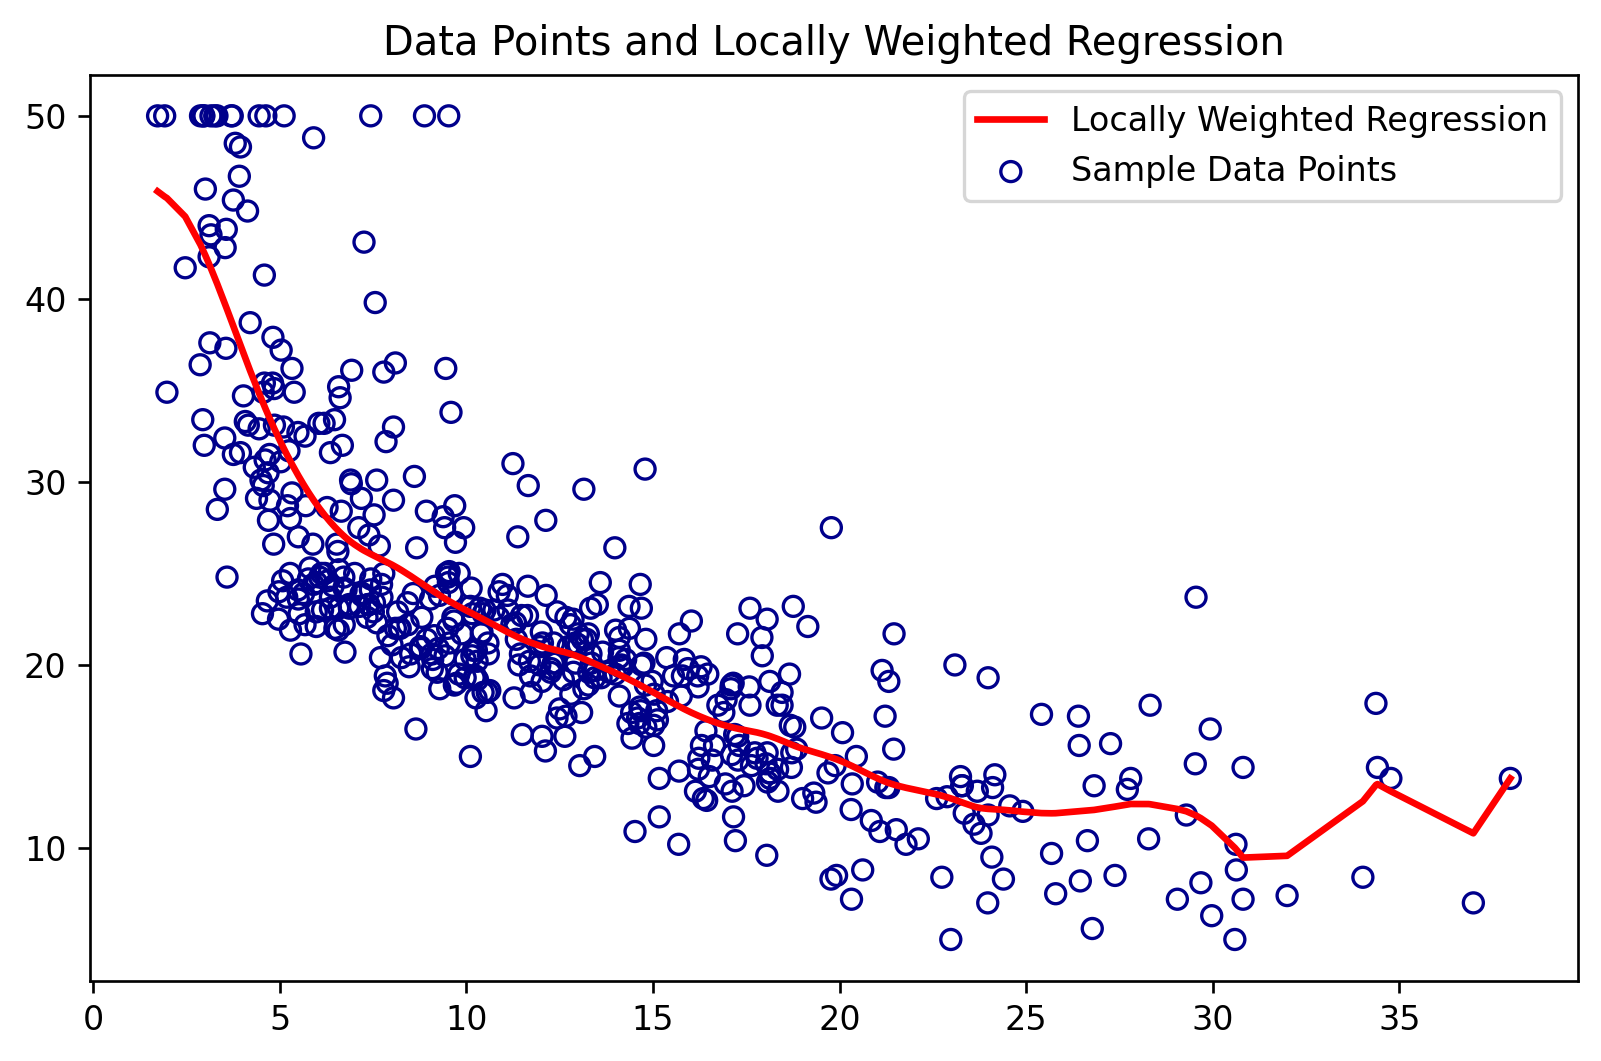

In [ ]:
#Show the curve of predicted y of locally weighted regressor.
x_sorted = np.sort(x)
yest_sorted = lowess_reg(x, y, x_sorted, tricubic, 1.5)

plt.figure(figsize=(8,5))
plt.scatter(x,y,facecolors = 'none', edgecolor = 'darkblue', label = 'Sample Data Points')
plt.plot(x_sorted,yest_sorted,color='red',lw=2,label = 'Locally Weighted Regression')
plt.legend()
plt.title('Data Points and Locally Weighted Regression')
plt.show()

# Conclusion

In this project, we compare the model accuracy of random forest and locally weighted regression. With a real dataset, the cross validated mean square error of random forest regressor is 27.29, the cross validated mean square error of loacally weighted regression is 26.97. Since LWR achieved a lower MSE, locally weighted regressor outperformed random forest regressor.